# Phase Relation at Different Wavenumber

## Import package

In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt

from tqdm import tqdm

## Load data

In [2]:
# load orginal state
with h5py.File("/work/b11209013/2025_Research/MSI/Full/Origin/state.h5", "r") as f:
    state      = np.array(f.get("state vector")) # Shape: (nk, var, ntime)
    time       = np.array(f.get("time"))
    variables  = np.array(f.get("variables"))[:, 0].astype(str)
    wavenumber = np.array(f.get("wavenumber"))

# load inverse matrix
with h5py.File("/work/b11209013/2025_Research/MSI/Sim_stuff/inv_mat.h5", "r") as f:
    x       = np.array(f.get("x"))
    inv_mat = np.array(f.get("inverse matrix"))

xleft  = -1e7
xright = 1e7
x_lim  = (x >= xleft) & (x <= xright)

x = x[x_lim]
inv_mat = inv_mat[x_lim, :]

## Reconstruct state series

In [3]:
# target wavenumber
target_ks = wavenumber[::-1][::4]
target_inv = inv_mat[:,::-1][:, ::4]
target_state = state[::-1, :, :][::4, :, :]

reconstruct = []

for i in range(target_state.shape[1]):

    sel_state = target_state[:, i, :]

    tmp = []

    for j in tqdm(range(sel_state.shape[0])):

        recon = target_inv[:, j][:, None] @ sel_state[j,:][None,:]
        tmp.append(recon)

    tmp = np.array(tmp)
    reconstruct.append(tmp)

reconstruct = np.array(reconstruct)

U = reconstruct[-1] + 0.7 * (reconstruct[-2] - 1.5*reconstruct[0])
J1 = reconstruct[-1] + U
J2 = reconstruct[-1] - U

reconstruct[-1] = J1
reconstruct = np.append(reconstruct, J2[None,...], axis=0)

variables[-1] = "J1"
variables = np.append(variables, "J2")

print(reconstruct.shape)

  0%|          | 0/19 [00:00<?, ?it/s]

100%|██████████| 19/19 [00:01<00:00, 10.99it/s]


(7, 19, 20001, 601)


## Plot phase relation

## Calculate phase relation

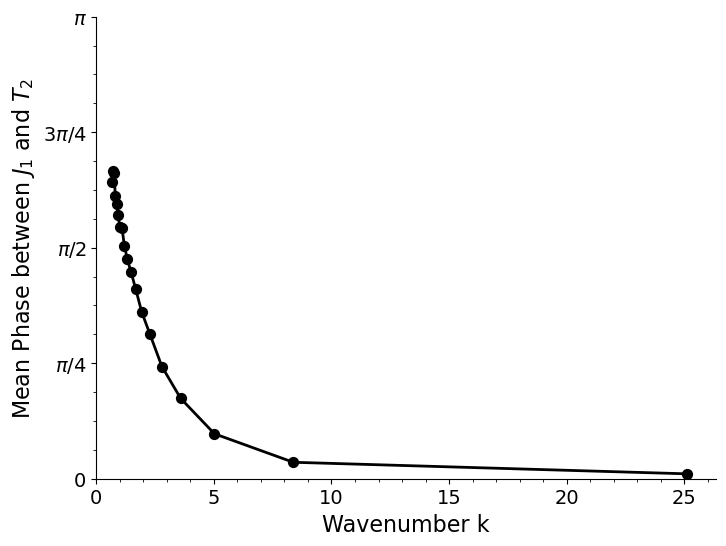

In [4]:
J1_T2_relation = {}

for j in range(len(target_ks)):

    target_kidx = j

    T2 = reconstruct[3, target_kidx, :, :].real
    J1 = reconstruct[5, target_kidx, :, :].real

    J1_T2_relation[str(target_ks[target_kidx])] = np.sum(J1*T2, axis=0) / (np.linalg.norm(T2, axis=0)*np.linalg.norm(J1, axis=0))

phase_means = []

for i in range(len(target_ks)):

    display_k = (40000/(2*np.pi*4320))*target_ks[i]
    display_lambda = 40000/display_k

    phase = np.arccos(J1_T2_relation[str(target_ks[i])])
    phase_mean = phase.mean()

    phase_means.append(phase_mean)

    plt.plot(time, phase, color="royalblue", linewidth=1)
    plt.axhline(phase_mean, color="k", linestyle="--")
    plt.yticks(np.linspace(0, np.pi, 5), [r"$0$", r"$\pi/4$", r"$\pi/2$", r"$3\pi/4$", r"$\pi$"])
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.xlim(0, 60)
    plt.ylim(0, np.pi)
    plt.title(f"Phase relation between J1 and T2, lambda = {display_lambda:.2f}, k = {display_k:.2f}")
    plt.savefig(f"/home/b11209013/2025_Research/MSI/Fig/Full/Origin/J1_T2_Phase/k={display_k:.2f}.png", dpi=500)
    plt.close()


fig = plt.figure(figsize=(8, 6))
plt.plot(target_ks, phase_means, color="k", linewidth=2)
plt.scatter(target_ks, phase_means, color="k", s=50)
plt.xlabel("Wavenumber k", fontsize=16)
plt.ylabel(r"Mean Phase between $J_1$ and $T_2$", fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(
    np.linspace(0, np.pi, 5),
    [r"$0$", r"$\pi/4$", r"$\pi/2$", r"$3\pi/4$", r"$\pi$"],
    fontsize=14
    )
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.minorticks_on()
plt.xlim(0, None)
plt.ylim(0, np.pi)
plt.savefig(f"/home/b11209013/2025_Research/MSI/Fig/Full/Origin/J1_T2_Phase/k_dep.png", dpi=500)

### q T2 relation

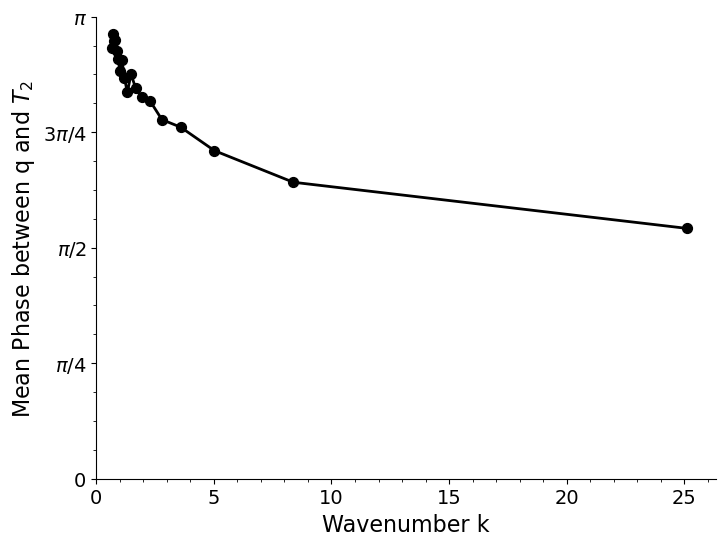

In [5]:
q_T2_relation = {}

for j in range(len(target_ks)):

    target_kidx = j

    T2 = reconstruct[3, target_kidx, :, :].real
    q = reconstruct[4, target_kidx, :, :].real

    q_T2_relation[str(target_ks[target_kidx])] = np.sum(q*T2, axis=0) / (np.linalg.norm(T2, axis=0)*np.linalg.norm(q, axis=0))

phase_means = []

for i in range(len(target_ks)):

    display_k = (40000/(2*np.pi*4320))*target_ks[i]
    display_lambda = 40000/display_k

    phase = np.arccos(q_T2_relation[str(target_ks[i])])
    phase_mean = phase.mean()

    phase_means.append(phase_mean)

    plt.plot(time, phase, color="royalblue", linewidth=1)
    plt.axhline(phase_mean, color="k", linestyle="--")
    plt.yticks(np.linspace(0, np.pi, 5), [r"$0$", r"$\pi/4$", r"$\pi/2$", r"$3\pi/4$", r"$\pi$"])
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.xlim(0, 60)
    plt.ylim(0, np.pi)
    plt.title(f"Phase relation between q and T2, lambda = {display_lambda:.2f}, k = {display_k:.2f}")
    plt.savefig(f"/home/b11209013/2025_Research/MSI/Fig/Full/Origin/q_T2_Phase/k={display_k:.2f}.png", dpi=500)
    plt.close()


fig = plt.figure(figsize=(8, 6))
plt.plot(target_ks, phase_means, color="k", linewidth=2)
plt.scatter(target_ks, phase_means, color="k", s=50)
plt.xlabel("Wavenumber k", fontsize=16)
plt.ylabel(r"Mean Phase between q and $T_2$", fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(
    np.linspace(0, np.pi, 5),
    [r"$0$", r"$\pi/4$", r"$\pi/2$", r"$3\pi/4$", r"$\pi$"],
    fontsize=14
    )
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.minorticks_on()
plt.xlim(0, None)
plt.ylim(0, np.pi)
plt.savefig(f"/home/b11209013/2025_Research/MSI/Fig/Full/Origin/q_T2_Phase/k_dep.png", dpi=500)